In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

sns.set_theme()
sns.set_palette("husl")

In [6]:
df = pd.read_csv('dataset_time_Series/sensor.csv')

In [7]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (220320, 55)

First few rows of the dataset:


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [10]:
df['timestamp_parsed'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['minutes_since_start'] = (df['timestamp_parsed'] - df['timestamp_parsed'].min()).dt.total_seconds() // 60
df[['timestamp', 'timestamp_parsed', 'minutes_since_start']].head(10)

,timestamp,timestamp_parsed,minutes_since_start
0,2018-04-01 00:00:00,2018-04-01 00:00:00,0.0
1,2018-04-01 00:01:00,2018-04-01 00:01:00,1.0
2,2018-04-01 00:02:00,2018-04-01 00:02:00,2.0
3,2018-04-01 00:03:00,2018-04-01 00:03:00,3.0
4,2018-04-01 00:04:00,2018-04-01 00:04:00,4.0
5,2018-04-01 00:05:00,2018-04-01 00:05:00,5.0
6,2018-04-01 00:06:00,2018-04-01 00:06:00,6.0
7,2018-04-01 00:07:00,2018-04-01 00:07:00,7.0
8,2018-04-01 00:08:00,2018-04-01 00:08:00,8.0
9,2018-04-01 00:09:00,2018-04-01 00:09:00,9.0


In [11]:
selected_sensors = ['sensor_10', 'sensor_36', 'sensor_48', 'minutes_since_start']
print("Dataset Shape:", df.shape)
df[selected_sensors].head()

Dataset Shape: (220320, 57)


,sensor_10,sensor_36,sensor_48,minutes_since_start
0,37.22740,195.0655,157.9861,0.0
1,37.22740,195.0655,157.9861,1.0
2,37.86777,200.9694,155.9606,2.0
3,38.57977,193.1689,155.9606,3.0
4,39.48939,193.8770,158.2755,4.0


In [14]:
print("\nMissing Values (selected sensors):")
print(df[selected_sensors].isnull().sum())


Missing Values (selected sensors):
sensor_10              19
sensor_36              16
sensor_48              27
minutes_since_start     0
dtype: int64


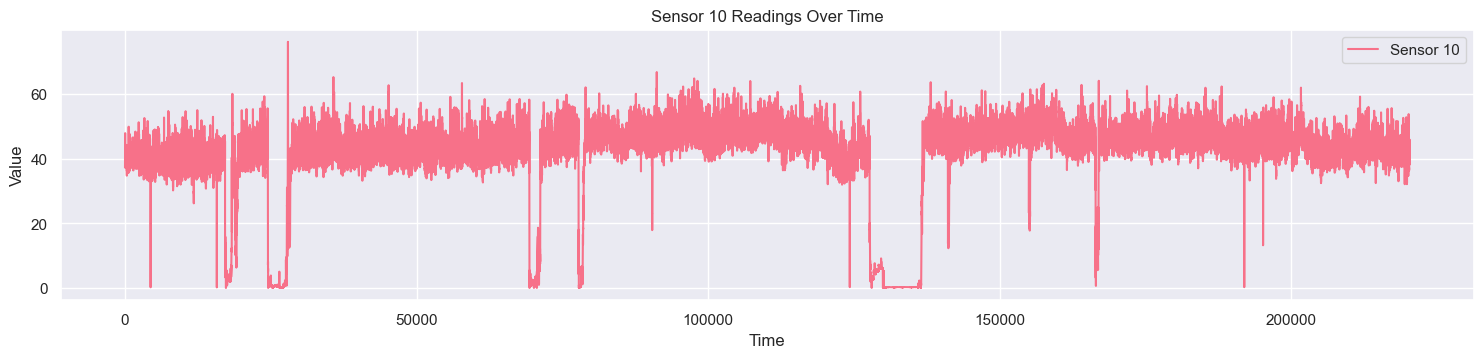

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['minutes_since_start'],df['sensor_10'], label='Sensor 10')
plt.title('Sensor 10 Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

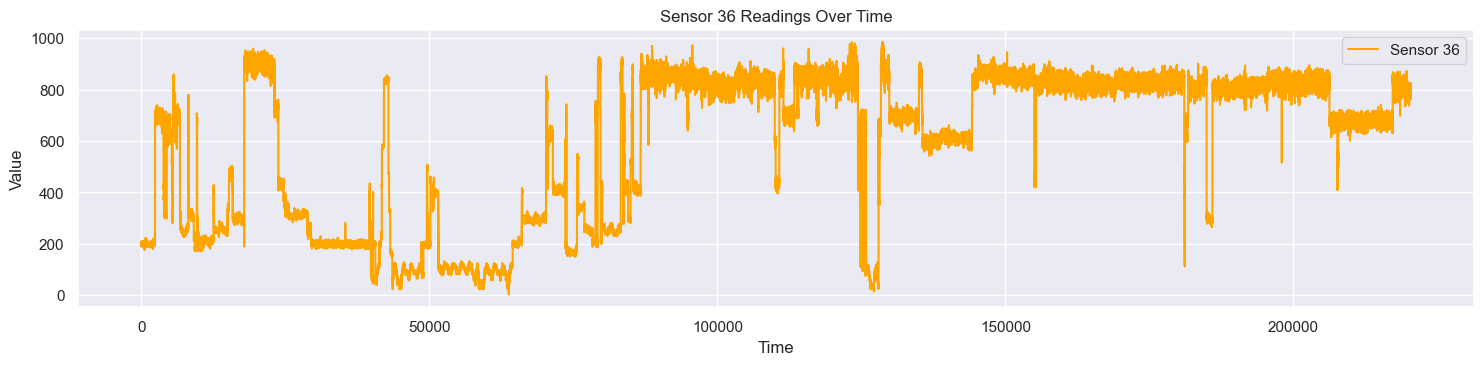

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 2)
plt.plot(df['minutes_since_start'],df['sensor_36'], label='Sensor 36', color='orange')
plt.title('Sensor 36 Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

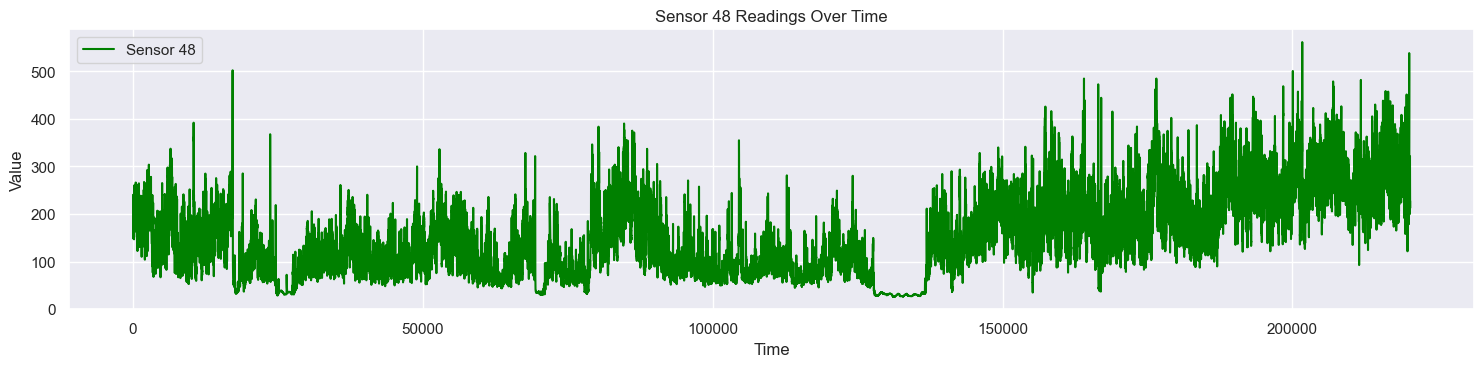

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 3)
plt.plot(df['minutes_since_start'], df['sensor_48'], label='Sensor 48', color='green')
plt.title('Sensor 48 Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

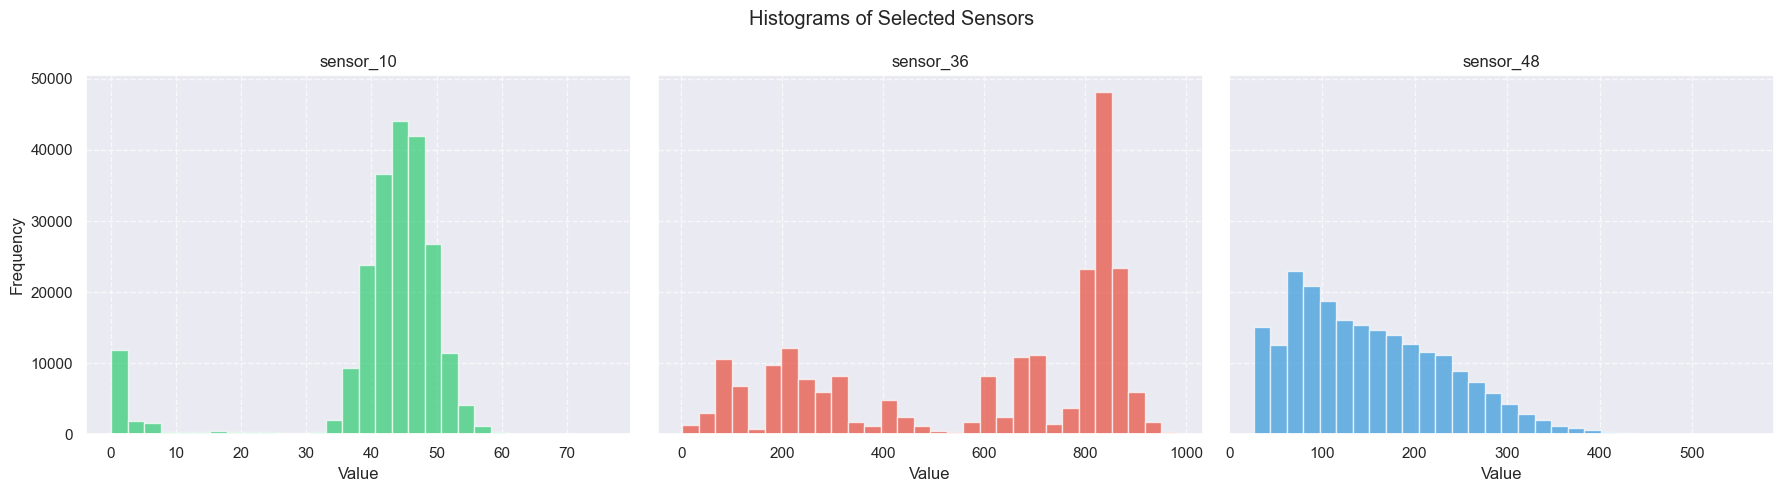

In [28]:
selected_sensors = ['sensor_10', 'sensor_36', 'sensor_48']
data = [df[sensor].dropna().values for sensor in selected_sensors]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
colors = ['#2ecc71', '#e74c3c', '#3498db']

for i, sensor in enumerate(selected_sensors):
    axes[i].hist(df[sensor].dropna(), bins=30, color=colors[i], alpha=0.7)
    axes[i].set_title(sensor)
    axes[i].set_xlabel('Value')
    axes[i].grid(True, linestyle='--', alpha=0.7)
axes[0].set_ylabel('Frequency')
fig.suptitle('Histograms of Selected Sensors')
fig.tight_layout()
plt.show()

Anomaly Existence (True = Normal, False = Others)


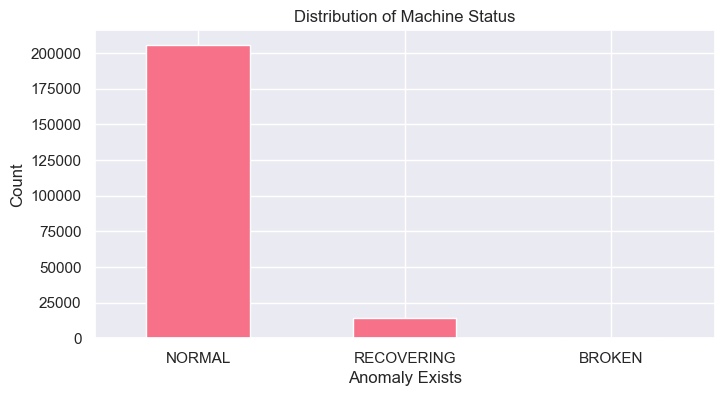

In [34]:
plt.figure(figsize=(8, 4))
df['machine_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Machine Status')
print('Anomaly Existence (True = Normal, False = Others)')
plt.xlabel('Anomaly Exists')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

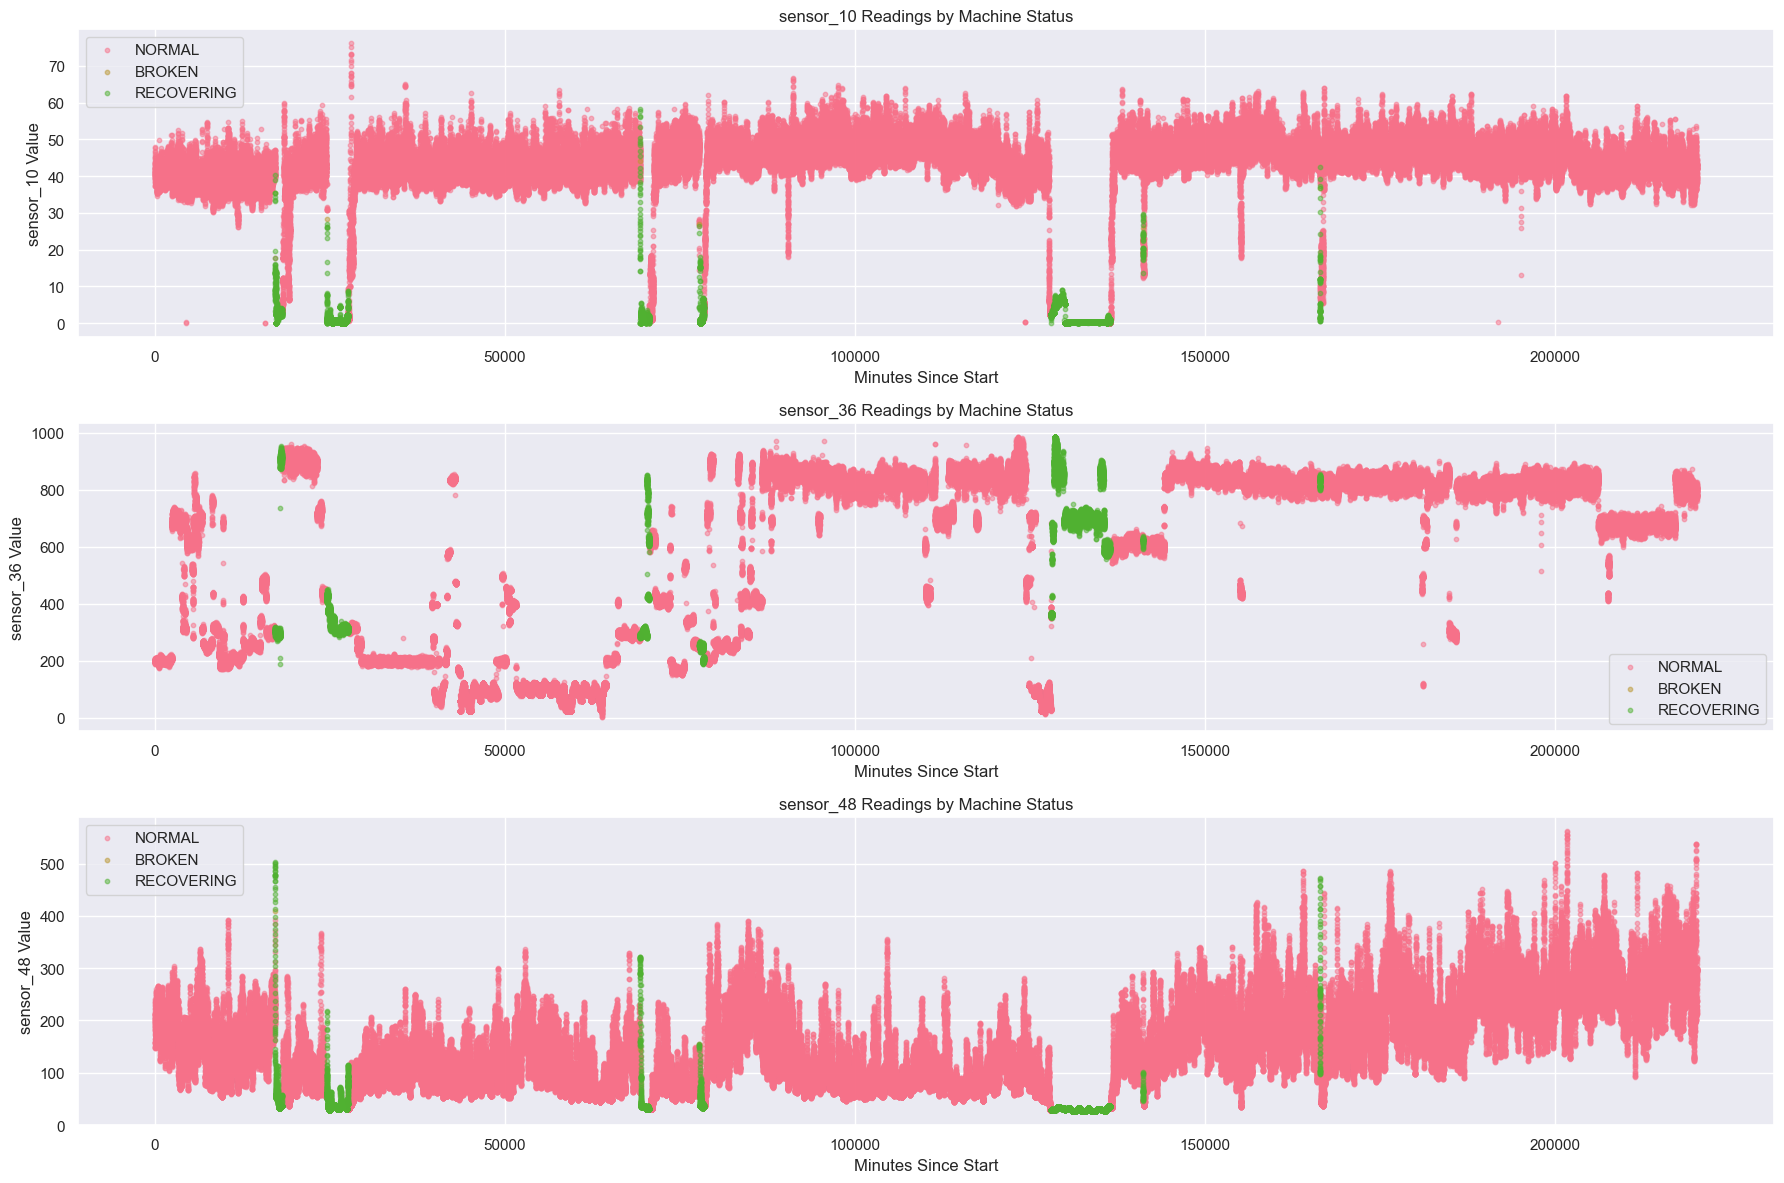

In [45]:
selected_sensors = ['sensor_10', 'sensor_36', 'sensor_48']

plt.figure(figsize=(18, 12))

for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(3, 1, i)
    for status in df['machine_status'].unique():
        mask = df['machine_status'] == status
        plt.scatter(df[mask]['minutes_since_start'], df[mask][sensor], label=status, alpha=0.5, s=10)
    plt.title(f'{sensor} Readings by Machine Status')
    plt.xlabel('Minutes Since Start')
    plt.ylabel(f'{sensor} Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
print(df['machine_status'].unique())

['NORMAL' 'BROKEN' 'RECOVERING']


In [50]:
df['is_anomaly'] = df['machine_status'] != 'NORMAL'
print(df['is_anomaly'].value_counts())

is_anomaly
False    205836
True      14484
Name: count, dtype: int64


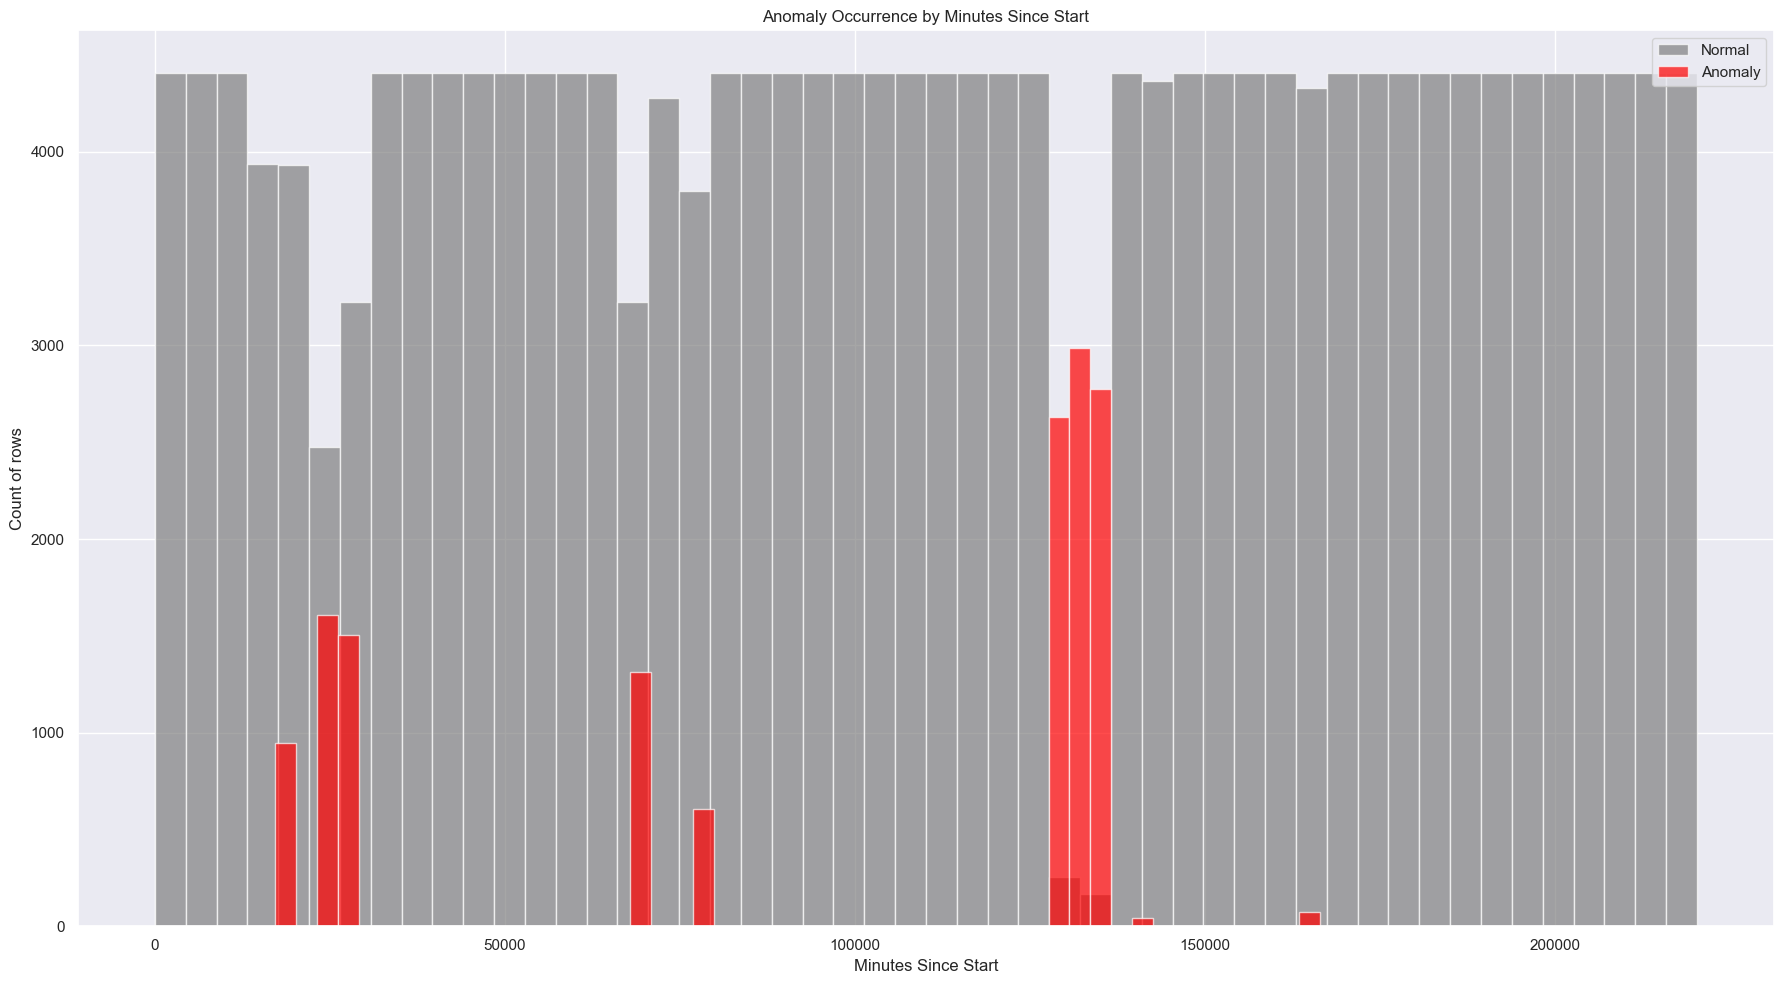

In [51]:
fig, ax = plt.subplots(1, figsize=(18, 10))

ax.hist(
    df.loc[~df['is_anomaly'], 'minutes_since_start'],
    bins=50,
    color='grey',
    alpha=0.7,
    label='Normal'
)

ax.hist(
    df.loc[df['is_anomaly'], 'minutes_since_start'],
    bins=50,
    color='red',
    alpha=0.7,
    label='Anomaly',
    #histtype='step'
)

ax.set_title("Anomaly Occurrence by Minutes Since Start")
ax.set_xlabel("Minutes Since Start")
ax.set_ylabel("Count of rows")
ax.legend()
plt.tight_layout()
plt.show()

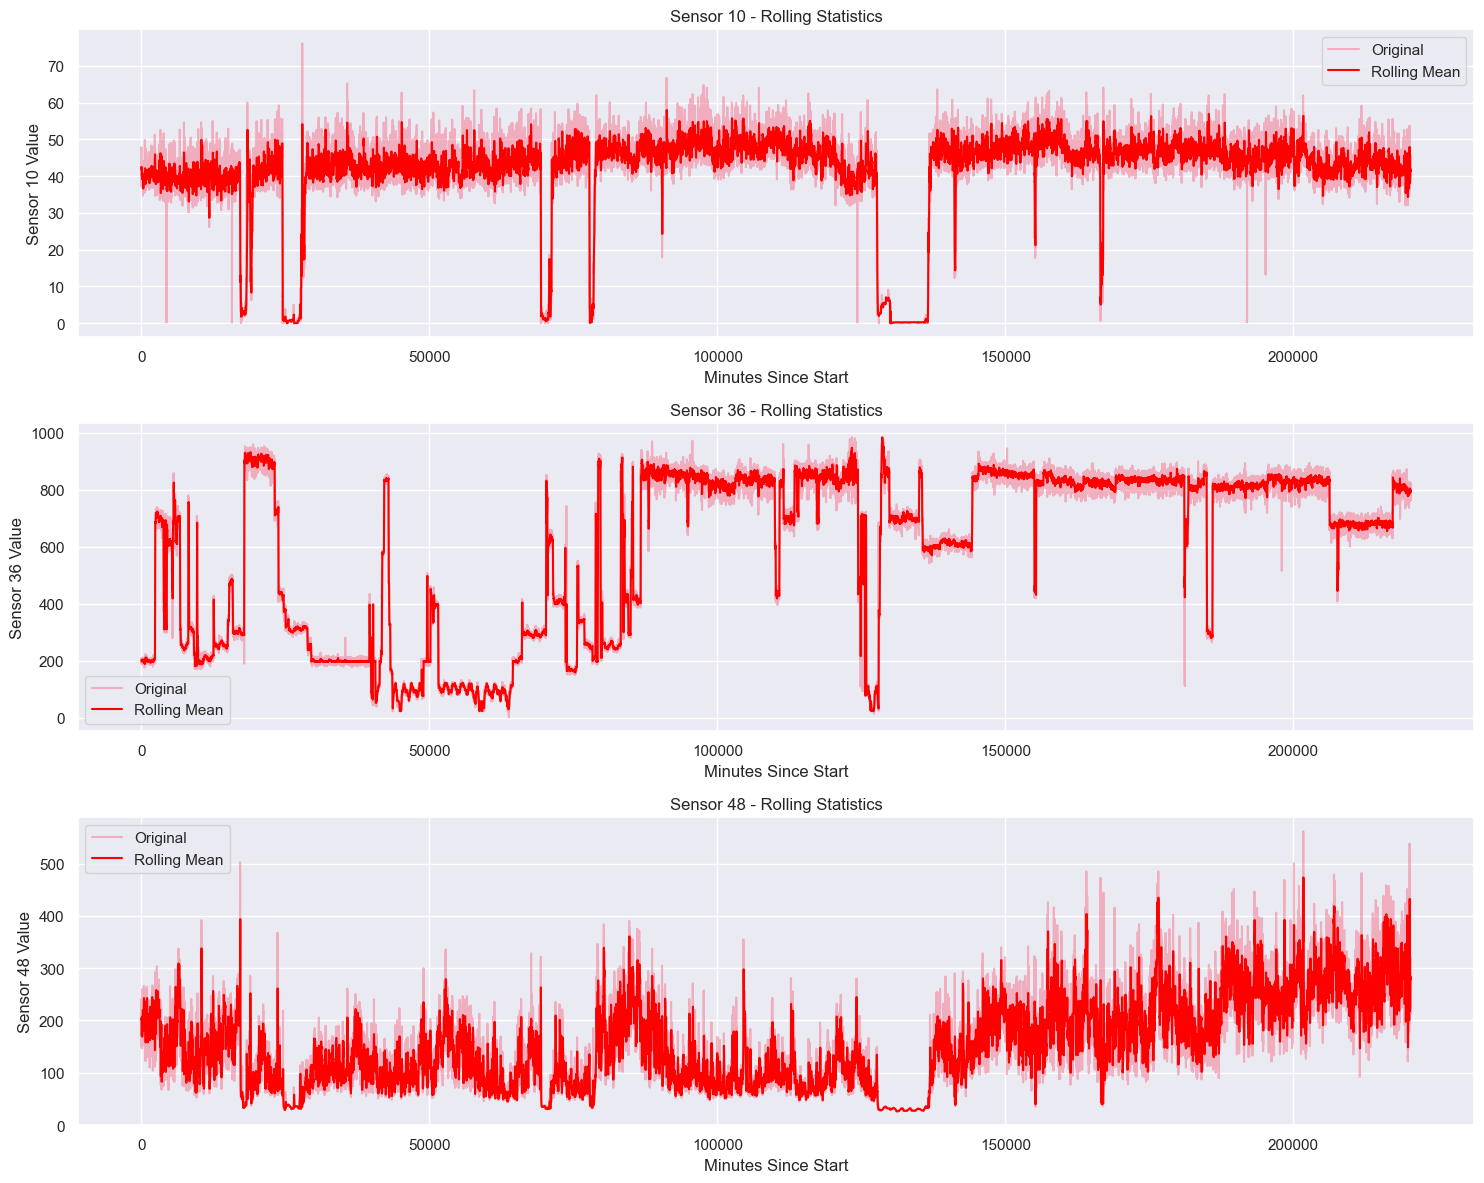

In [59]:
window_size = 50 
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(df['minutes_since_start'], df['sensor_10'], label='Original', alpha=0.5)
plt.plot(df['minutes_since_start'], df['sensor_10'].rolling(window=window_size).mean(), label='Rolling Mean', color='red')
plt.title('Sensor 10 - Rolling Statistics')
plt.xlabel('Minutes Since Start')
plt.ylabel('Sensor 10 Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['minutes_since_start'], df['sensor_36'], label='Original', alpha=0.5)
plt.plot(df['minutes_since_start'], df['sensor_36'].rolling(window=window_size).mean(), label='Rolling Mean', color='red')
plt.title('Sensor 36 - Rolling Statistics')
plt.xlabel('Minutes Since Start')
plt.ylabel('Sensor 36 Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['minutes_since_start'], df['sensor_48'], label='Original', alpha=0.5)
plt.plot(df['minutes_since_start'], df['sensor_48'].rolling(window=window_size).mean(), label='Rolling Mean', color='red')
plt.title('Sensor 48 - Rolling Statistics')
plt.xlabel('Minutes Since Start')
plt.ylabel('Sensor 48 Value')
plt.legend()

plt.tight_layout()
plt.show()